<a href="https://colab.research.google.com/github/hayesfj/desktop-tutorial/blob/main/Problem_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install simfin

     |████████████████████████████████| 60 kB 3.9 MB/s 


In [10]:
import simfin as sf
import pandas as pd

TIMEFRAME = 'ttm'

# Set your API-key for downloading data. This key gets the free data.
sf.set_api_key('free')

# Set the local directory where data-files are stored.
# The directory will be created if it does not already exist.
sf.set_data_dir('~/simfin_data/')

# Download the data from the SimFin server and load into a Pandas DataFrame.
# Income Statement
IS_df = sf.load_income(variant=TIMEFRAME, market='us')

# Cash Flow Statement
CF_df = sf.load_cashflow(variant=TIMEFRAME, market='us')

# Daily Share Prices
share_price_df = sf.load_shareprices(variant='daily', market='us')


Dataset "us-income-ttm" on disk (0 days old).
- Loading from disk ... Done!
Dataset "us-cashflow-ttm" on disk (0 days old).
- Loading from disk ... Done!
Dataset "us-shareprices-daily" on disk (0 days old).
- Loading from disk ... Done!


In [16]:
# Build the value_df
value_df=[]
value_df = IS_df
value_df['owners_income'] = CF_df['Net Cash from Operating Activities'] - CF_df['Change in Fixed Assets & Intangibles']
value_df['owners_income_per_share'] = value_df['owners_income'] / IS_df['Shares (Basic)']
value_df['share_price'] = share_price_df['Close']
value_df['P/OI'] = value_df['share_price'] / value_df['owners_income_per_share']

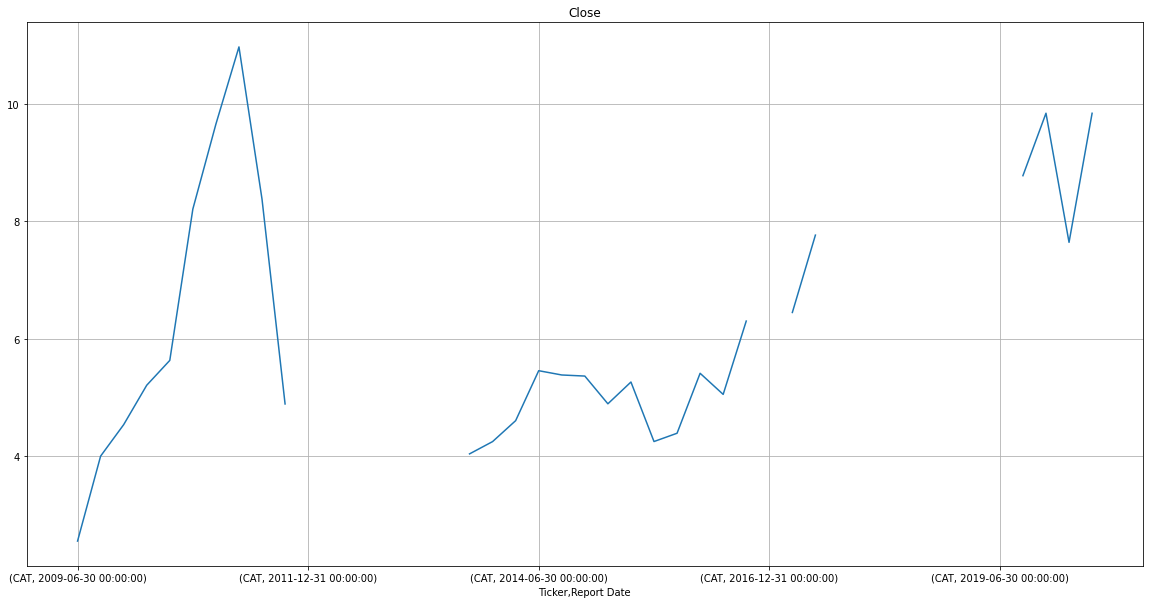

In [18]:
# What Stock Symbol do you want to look at?
ticker = value_df.query('Ticker=="CAT"')
ticker['P/OI'].plot(grid=True, figsize=(20,10), title='Close')

In [20]:
ticker['share_price']

Ticker  Report Date
CAT     2009-06-30      33.04
        2009-09-30      51.33
        2009-12-31      56.99
        2010-03-31      62.85
        2010-06-30      60.07
        2010-09-30      78.68
        2010-12-31      93.66
        2011-03-31     111.35
        2011-06-30     106.46
        2011-09-30      73.84
        2011-12-31        NaN
        2012-03-31        NaN
        2012-06-30        NaN
        2012-09-30        NaN
        2012-12-31      89.61
        2013-03-31        NaN
        2013-06-30        NaN
        2013-09-30      83.40
        2013-12-31      90.81
        2014-03-31      99.37
        2014-06-30     108.67
        2014-09-30      99.03
        2014-12-31      91.53
        2015-03-31      80.03
        2015-06-30      84.82
        2015-09-30      65.36
        2015-12-31      67.96
        2016-03-31      76.54
        2016-06-30      75.81
        2016-09-30      88.77
        2016-12-31        NaN
        2017-03-31      92.76
        2017-06-30  